In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")

In [3]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [5]:
train_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
test_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## data preprocessing

Text(0.5, 1.0, 'DIS Stock Price')

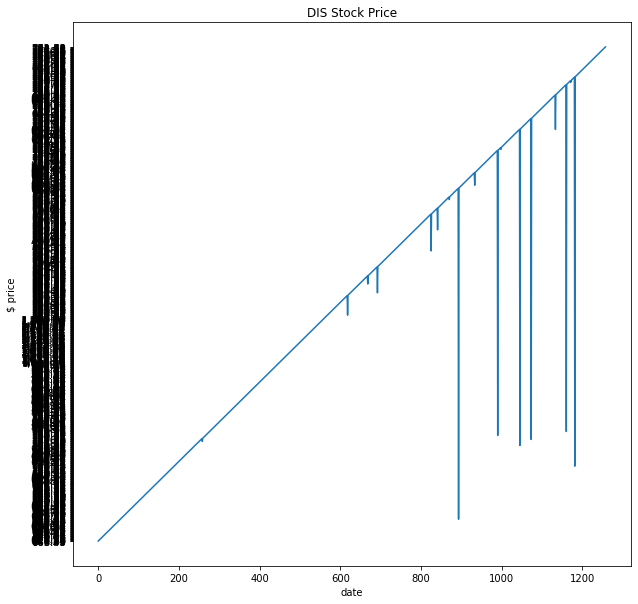

In [7]:
plt.figure(figsize=(10,10))
plt.plot(train_df.index, train_df['Close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("DIS Stock Price")

Text(0.5, 1.0, 'DIS Stock Price')

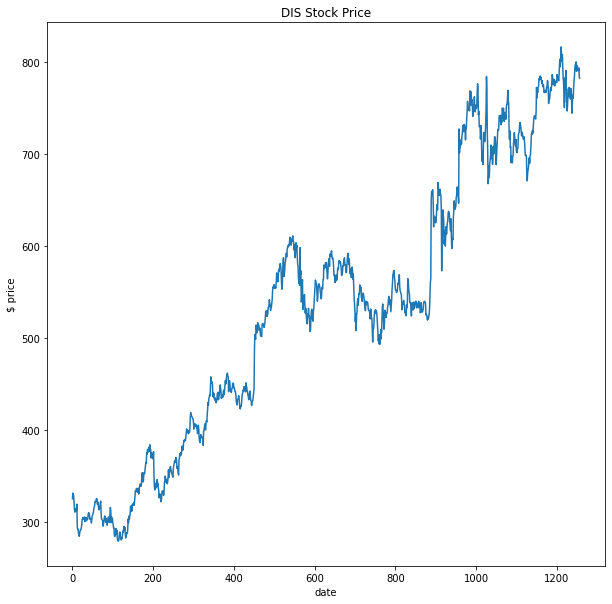

In [8]:
plt.figure(figsize=(10,10))
plt.plot(train_df.index, train_df['Open'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("DIS Stock Price")

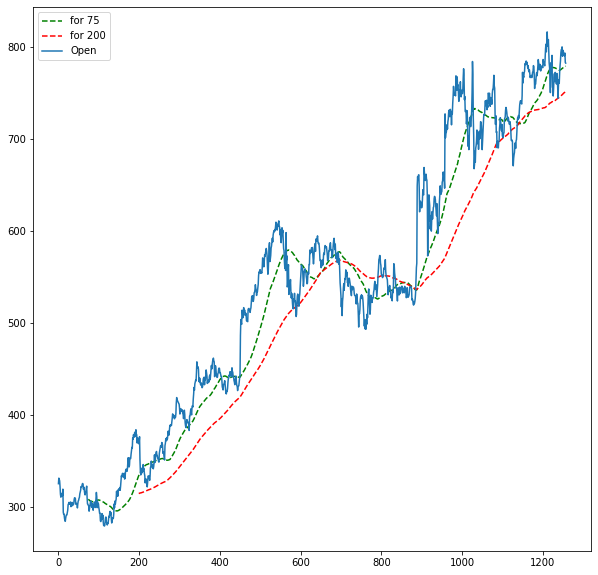

In [9]:
first_one = train_df['Open'].rolling(window=75).mean()
second_one = train_df['Open'].rolling(window=200).mean()

plt.figure(figsize=(10,10))
plt.plot(first_one, 'g--', label="for 75")
plt.plot(second_one, 'r--', label="for 200")
plt.plot(train_df['Open'], label="Open")
plt.legend()
plt.show()

In [10]:
#creating a numpy array with open column
training_set=train_df.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


## feature-Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler.fit_transform(training_set)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [12]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [13]:
print(y_train)
print(len(X_train))

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]
1198


In [14]:
#adding the new dimention
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [15]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Building the RNN 

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0434
Epoch 2/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0042
Epoch 13/100


In [31]:
#saving the model
regressor.save("stock2.h5")

## for testing

In [32]:
real_test_set=test_df.iloc[:,1:2].values
print(real_test_set)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [33]:
total=pd.concat((train_df['Open'],test_df['Open']),axis=0)

In [34]:
test_inputs=total[len(total)-len(test_df)-60:].values
test_inputs=test_inputs.reshape(-1,1)
test_inputs=scaler.transform(test_inputs)

In [35]:
print(len(test_inputs))
X_test=[]
for i in range(60,80):
    X_test.append(test_inputs[i-60:i,0])
X_test=np.array(X_test)
print(X_test)

80
[[0.9299055  0.93113327 0.92750577 ... 0.95725128 0.93796041 0.93688146]
 [0.93113327 0.92750577 0.94415507 ... 0.93796041 0.93688146 0.92955205]
 [0.92750577 0.94415507 0.93876032 ... 0.93688146 0.92955205 0.94731751]
 ...
 [0.96054394 0.9371419  0.92841729 ... 1.01045465 1.02407173 1.03930724]
 [0.9371419  0.92841729 0.90804747 ... 1.02407173 1.03930724 1.03354044]
 [0.92841729 0.90804747 0.8771858  ... 1.03930724 1.03354044 0.99624228]]


In [36]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [37]:
pred=regressor.predict(X_test)

In [38]:
predicted_test_set=scaler.inverse_transform(pred)

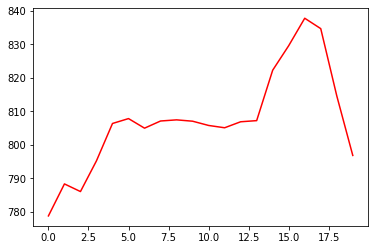

In [39]:
plt.plot(real_test_set,color='red',label='Real price of stock in dataset')

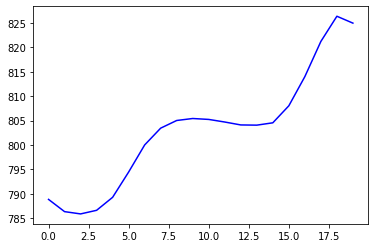

In [40]:
plt.plot(predicted_test_set,color='blue',label='predicted price of stock in dataset')

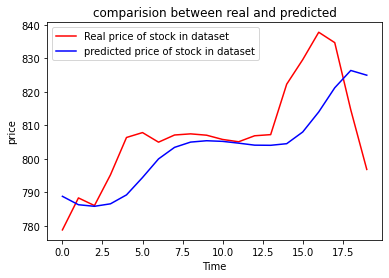

In [41]:
plt.plot(real_test_set,color='red',label='Real price of stock in dataset')
plt.plot(predicted_test_set,color='blue',label='predicted price of stock in dataset')
plt.title("comparision between real and predicted")
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()